#                                         FIFA WORLDCUP ANALYSIS

#                               (MINI PROJECT DATA ANALYTICS LAB)                   20MCA36

In [1]:
####IMPORTING LIBRARIES (DATA UNDERSTANDING)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [31]:
####IMPORTING DATA SOURCES#######

df_Matches = pd.read_csv("WorldCupMatches.csv")
df_Players = pd.read_csv('WorldCupPlayers.csv')
df_Cups = pd.read_csv('WorldCups.csv')

In [4]:
####Display the first and last 5 records#####



# Displaying the top 5 rows of the dataframe(Matches)
display(df_Matches.head())

# Displaying the statistical information for the dataframeins
display(df_Matches.describe())

# Displaying the information of the dataframe
display(df_Matches.info())

# Displaying the dimention of the dataframe
display ("Shape of Matches " , df_Matches.shape)
print(f"The Matches data set has {df_Matches.shape[0]} rows and {df_Matches.shape[1]} columns")

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

None

'Shape of Matches '

(4572, 20)

The Matches data set has 4572 rows and 20 columns


In [5]:
# Checking if i have some null values
df_Matches.isnull().sum()

Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

In [6]:
# Showing all the available columns in the Matches dataset

df_Matches.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [8]:
# Displaying the top 5 rows of the dataframe( Players )
display(df_Players.head())

# Displaying the statistical information for the dataframe
display(df_Players.describe())

# Displaying the information of the dataframe
display(df_Players.info())

# Displaying the dimentions of data frames(PLAYERS)

display ("Shape of df_Players " , df_Players.shape)
print(f"The Players data set has {df_Players.shape[0]} rows and {df_Players.shape[1]} columns")

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


,RoundID,MatchID,Shirt Number
count,3.778400e+04,3.778400e+04,37784.000000
mean,1.105647e+07,6.362233e+07,10.726022
std,2.770144e+07,1.123916e+08,6.960138
min,2.010000e+02,2.500000e+01,0.000000
25%,2.630000e+02,1.199000e+03,5.000000
50%,3.370000e+02,2.216000e+03,11.000000
75%,2.559310e+05,9.741000e+07,17.000000
max,9.741060e+07,3.001865e+08,23.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        37784 non-null  int64 
 1   MatchID        37784 non-null  int64 
 2   Team Initials  37784 non-null  object
 3   Coach Name     37784 non-null  object
 4   Line-up        37784 non-null  object
 5   Shirt Number   37784 non-null  int64 
 6   Player Name    37784 non-null  object
 7   Position       4143 non-null   object
 8   Event          9069 non-null   object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


None

'Shape of df_Players '

(37784, 9)

The Players data set has 37784 rows and 9 columns


In [9]:
df_Matches.last_valid_index()

851

In [10]:
df_Matches[850:860]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
850,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
851,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG
852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Dropping all the null values

df_Matches = df_Matches.dropna()

In [12]:
# Now rechecking for the null values

df_Matches.isnull().sum() 

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [13]:
df_Matches_dup = df_Matches[df_Matches.duplicated(keep = "last")]
df_Matches_dup

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
820,2014.0,28 Jun 2014 - 13:00,Round of 16,Estadio Mineirao,Belo Horizonte,Brazil,1.0,1.0,Chile,Brazil win on penalties (3 - 2),57714.0,0.0,0.0,WEBB Howard (ENG),MULLARKEY Michael (ENG),Darren CANN (ENG),255951.0,300186487.0,BRA,CHI
821,2014.0,28 Jun 2014 - 17:00,Round of 16,Estadio do Maracana,Rio De Janeiro,Colombia,2.0,0.0,Uruguay,,73804.0,1.0,0.0,Bj�rn KUIPERS (NED),Sander VAN ROEKEL (NED),Erwin ZEINSTRA (NED),255951.0,300186491.0,COL,URU
822,2014.0,30 Jun 2014 - 13:00,Round of 16,Estadio Nacional,Brasilia,France,2.0,0.0,Nigeria,,67882.0,0.0,0.0,GEIGER Mark (USA),HURD Sean (USA),FLETCHER Joe (CAN),255951.0,300186462.0,FRA,NGA
824,2014.0,04 Jul 2014 - 17:00,Quarter-finals,Estadio Castelao,Fortaleza,Brazil,2.0,1.0,Colombia,,60342.0,1.0,0.0,Carlos VELASCO CARBALLO (ESP),ALONSO FERNANDEZ Roberto (ESP),YUSTE Juan (ESP),255953.0,300186461.0,BRA,COL
825,2014.0,04 Jul 2014 - 13:00,Quarter-finals,Estadio do Maracana,Rio De Janeiro,France,0.0,1.0,Germany,,74240.0,0.0,1.0,PITANA Nestor (ARG),MAIDANA Hernan (ARG),BELATTI Juan Pablo (ARG),255953.0,300186485.0,FRA,GER
826,2014.0,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1.0,7.0,Germany,,58141.0,0.0,5.0,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955.0,300186474.0,BRA,GER
827,2014.0,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0.0,3.0,Netherlands,,68034.0,0.0,2.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957.0,300186502.0,BRA,NED
828,2014.0,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1.0,0.0,Argentina,Germany win after extra time,74738.0,0.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959.0,300186501.0,GER,ARG
829,2014.0,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0.0,0.0,Argentina,Argentina win on penalties (2 - 4),63267.0,0.0,0.0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955.0,300186490.0,NED,ARG
830,2014.0,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0.0,0.0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0.0,0.0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953.0,300186488.0,NED,CRC


In [14]:
df_Matches_dup1 = df_Matches[df_Matches.duplicated(keep = "first" )]
df_Matches_dup1

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
836,2014.0,28 Jun 2014 - 13:00,Round of 16,Estadio Mineirao,Belo Horizonte,Brazil,1.0,1.0,Chile,Brazil win on penalties (3 - 2),57714.0,0.0,0.0,WEBB Howard (ENG),MULLARKEY Michael (ENG),Darren CANN (ENG),255951.0,300186487.0,BRA,CHI
837,2014.0,28 Jun 2014 - 17:00,Round of 16,Estadio do Maracana,Rio De Janeiro,Colombia,2.0,0.0,Uruguay,,73804.0,1.0,0.0,Bj�rn KUIPERS (NED),Sander VAN ROEKEL (NED),Erwin ZEINSTRA (NED),255951.0,300186491.0,COL,URU
838,2014.0,29 Jun 2014 - 13:00,Round of 16,Estadio Castelao,Fortaleza,Netherlands,2.0,1.0,Mexico,,58817.0,0.0,0.0,PROENCA Pedro (POR),MIRANDA Bertino (POR),TRIGO Jose (POR),255951.0,300186508.0,NED,MEX
839,2014.0,29 Jun 2014 - 17:00,Round of 16,Arena Pernambuco,Recife,Costa Rica,1.0,1.0,Greece,Costa Rica win on penalties (5 - 3),41242.0,0.0,0.0,Ben WILLIAMS (AUS),CREAM Matthew (AUS),ANAZ Hakan (AUS),255951.0,300186459.0,CRC,GRE
840,2014.0,30 Jun 2014 - 13:00,Round of 16,Estadio Nacional,Brasilia,France,2.0,0.0,Nigeria,,67882.0,0.0,0.0,GEIGER Mark (USA),HURD Sean (USA),FLETCHER Joe (CAN),255951.0,300186462.0,FRA,NGA
842,2014.0,01 Jul 2014 - 13:00,Round of 16,Arena de Sao Paulo,Sao Paulo,Argentina,1.0,0.0,Switzerland,Argentina win after extra time,63255.0,0.0,0.0,ERIKSSON Jonas (SWE),KLASENIUS Mathias (SWE),WARNMARK Daniel (SWE),255951.0,300186503.0,ARG,SUI
843,2014.0,01 Jul 2014 - 17:00,Round of 16,Arena Fonte Nova,Salvador,Belgium,2.0,1.0,USA,Belgium win after extra time,51227.0,0.0,0.0,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255951.0,300186497.0,BEL,USA
844,2014.0,04 Jul 2014 - 13:00,Quarter-finals,Estadio do Maracana,Rio De Janeiro,France,0.0,1.0,Germany,,74240.0,0.0,1.0,PITANA Nestor (ARG),MAIDANA Hernan (ARG),BELATTI Juan Pablo (ARG),255953.0,300186485.0,FRA,GER
845,2014.0,04 Jul 2014 - 17:00,Quarter-finals,Estadio Castelao,Fortaleza,Brazil,2.0,1.0,Colombia,,60342.0,1.0,0.0,Carlos VELASCO CARBALLO (ESP),ALONSO FERNANDEZ Roberto (ESP),YUSTE Juan (ESP),255953.0,300186461.0,BRA,COL
846,2014.0,05 Jul 2014 - 13:00,Quarter-finals,Estadio Nacional,Brasilia,Argentina,1.0,0.0,Belgium,,68551.0,1.0,0.0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255953.0,300186504.0,ARG,BEL


In [15]:
# Shape of duplicate values

df_Matches_dup.shape

(15, 20)

In [16]:
# Removing duplicate values 

df_Matches = df_Matches.drop_duplicates()

In [17]:
# seeing the dimentions of data frames(MATCHES) afteer dropping null and duplicate values

display ("Shape of df_Matches " , df_Matches.shape)
print(f"The Matches data set has {df_Matches.shape[0]} rows and {df_Matches.shape[1]} columns")

'Shape of df_Matches '

(835, 20)

The Matches data set has 835 rows and 20 columns


In [18]:
# Checking if i have some null values
df_Players.isnull().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

In [22]:
from scipy import stats
def Tabulation(x):
    table = pd.DataFrame(x.dtypes,columns=['dtypes'])
    table1 =pd.DataFrame(x.columns,columns=['Names'])
    table = table.reset_index()
    table= table.rename(columns={'index':'Name'})
    table['No of Missing'] = x.isnull().sum().values    
    table['No of Uniques'] = x.nunique().values
    table['Percent of Missing'] = ((x.isnull().sum().values)/ (x.shape[0])) *100
    table['First Observation'] = x.loc[0].values
    table['Second Observation'] = x.loc[1].values
    table['Third Observation'] = x.loc[2].values
    for name in table['Name'].value_counts().index:
        table.loc[table['Name'] == name, 'Entropy'] = round(stats.entropy(x[name].value_counts(normalize=True), base=2),2)
    return table

In [23]:
Tabulation(df_Matches)

,Name,dtypes,No of Missing,No of Uniques,Percent of Missing,First Observation,Second Observation,Third Observation,Entropy
0,Year,float64,0,20,0.0,1930.0,1930.0,1930.0,4.20
1,Datetime,object,0,601,0.0,13 Jul 1930 - 15:00,13 Jul 1930 - 15:00,14 Jul 1930 - 12:45,9.03
2,Stage,object,0,23,0.0,Group 1,Group 4,Group 2,4.19
3,Stadium,object,0,181,0.0,Pocitos,Parque Central,Parque Central,7.30
4,City,object,0,151,0.0,Montevideo,Montevideo,Montevideo,6.99
5,Home Team Name,object,0,78,0.0,France,USA,Yugoslavia,5.39
6,Home Team Goals,float64,0,11,0.0,4.0,3.0,2.0,2.51
7,Away Team Goals,float64,0,7,0.0,1.0,0.0,1.0,1.92
8,Away Team Name,object,0,83,0.0,Mexico,Belgium,Brazil,5.90
9,Win conditions,object,0,43,0.0,,,,0.70


In [25]:
Tabulation(df_Matches)


,Name,dtypes,No of Missing,No of Uniques,Percent of Missing,First Observation,Second Observation,Third Observation,Entropy
0,Year,float64,0,20,0.0,1930.0,1930.0,1930.0,4.20
1,Datetime,object,0,601,0.0,13 Jul 1930 - 15:00,13 Jul 1930 - 15:00,14 Jul 1930 - 12:45,9.03
2,Stage,object,0,23,0.0,Group 1,Group 4,Group 2,4.19
3,Stadium,object,0,181,0.0,Pocitos,Parque Central,Parque Central,7.30
4,City,object,0,151,0.0,Montevideo,Montevideo,Montevideo,6.99
5,Home Team Name,object,0,78,0.0,France,USA,Yugoslavia,5.39
6,Home Team Goals,float64,0,11,0.0,4.0,3.0,2.0,2.51
7,Away Team Goals,float64,0,7,0.0,1.0,0.0,1.0,1.92
8,Away Team Name,object,0,83,0.0,Mexico,Belgium,Brazil,5.90
9,Win conditions,object,0,43,0.0,,,,0.70


In [26]:
def show_unique(x):
    class color:
        BOLD = '\033[1m'
        END = '\033[0m'
    for col in x.columns:
        print("Total Unique  " + color.BOLD +col+ color.END + "  values in Train Data {}".format(x[col].nunique()))

In [27]:
show_unique(df_Matches)

Total Unique  Year  values in Train Data 20
Total Unique  Datetime  values in Train Data 601
Total Unique  Stage  values in Train Data 23
Total Unique  Stadium  values in Train Data 181
Total Unique  City  values in Train Data 151
Total Unique  Home Team Name  values in Train Data 78
Total Unique  Home Team Goals  values in Train Data 11
Total Unique  Away Team Goals  values in Train Data 7
Total Unique  Away Team Name  values in Train Data 83
Total Unique  Win conditions  values in Train Data 43
Total Unique  Attendance  values in Train Data 622
Total Unique  Half-time Home Goals  values in Train Data 7
Total Unique  Half-time Away Goals  values in Train Data 6
Total Unique  Referee  values in Train Data 366
Total Unique  Assistant 1  values in Train Data 387
Total Unique  Assistant 2  values in Train Data 408
Total Unique  RoundID  values in Train Data 101
Total Unique  MatchID  values in Train Data 835
Total Unique  Home Team Initials  values in Train Data 77
Total Unique  Away Team

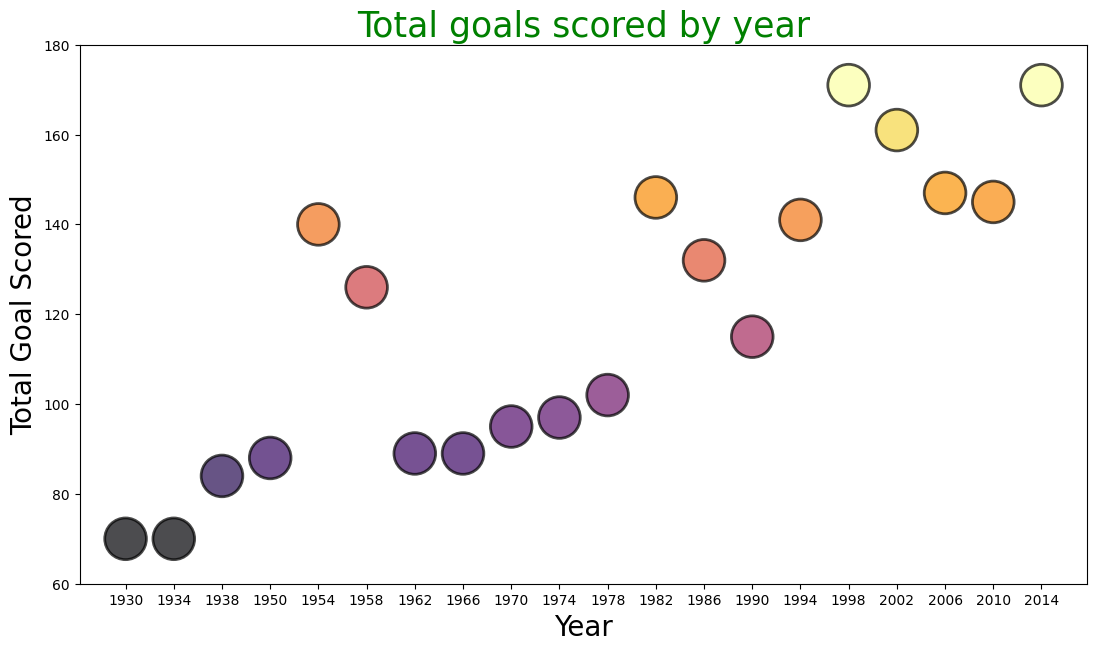

In [32]:
#####  DATA EXPLORATION USING VARIOUS PLOTS   ######


# Here i m showing total goals scored by year using scatter plot

def Total_Goals_Scored_by_year(x):
    plt.figure(figsize=(13,7))
    x["Year1"] = x["Year"].astype(str)
    
    ax = plt.scatter("Year1","GoalsScored",
                     data=df_Cups,
                     c=df_Cups["GoalsScored"],
                     cmap="inferno",
                     s=900,
                     alpha=.7,
                     linewidth=2,
                     edgecolor="k")

    plt.xticks(x["Year1"].unique())
    plt.yticks(np.arange(60,200,20))
    plt.xlabel("Year", fontsize=20)
    plt.ylabel("Total Goal Scored",fontsize=20)
    plt.title('Total goals scored by year', fontsize = 25 , color = "green")
    plt.show()
Total_Goals_Scored_by_year(df_Cups)

C:\Users\aer\AppData\Local\Temp\ipykernel_10956\3151517267.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_Matches["Away Team Goals"],color="r",rug=True)


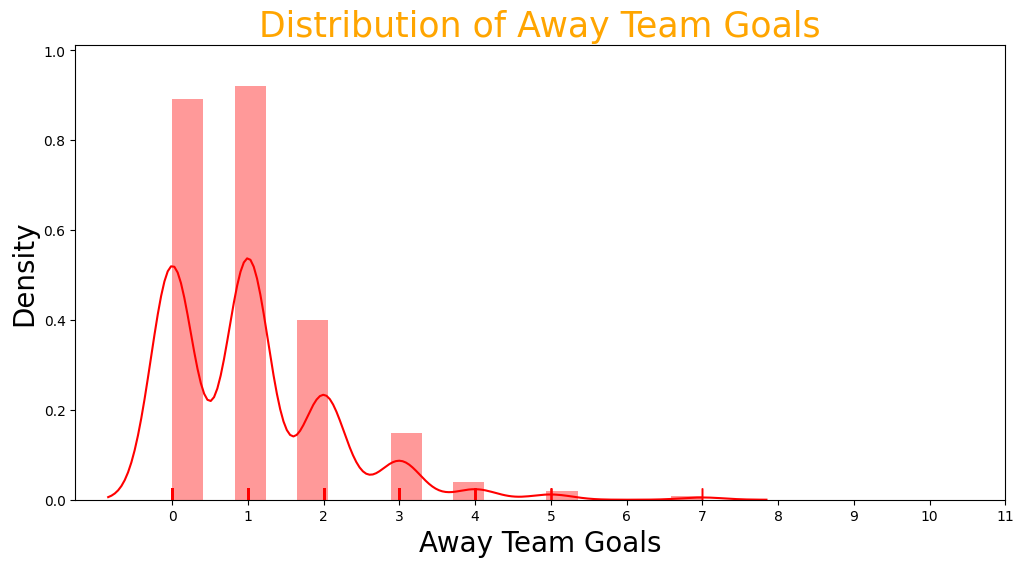

In [33]:
plt.figure(figsize=(12,13))
plt.subplot(212)
sns.distplot(df_Matches["Away Team Goals"],color="r",rug=True)
plt.xticks(np.arange(0,12,1))
plt.xlabel("Away Team Goals", fontsize=20)
plt.ylabel("Density", fontsize=20)    
plt.title("Distribution of Away Team Goals" , fontsize = 25 , color = "orange")
plt.show()

C:\Users\aer\AppData\Local\Temp\ipykernel_10956\1804873511.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_Matches["Home Team Goals"],color="b",rug=True)


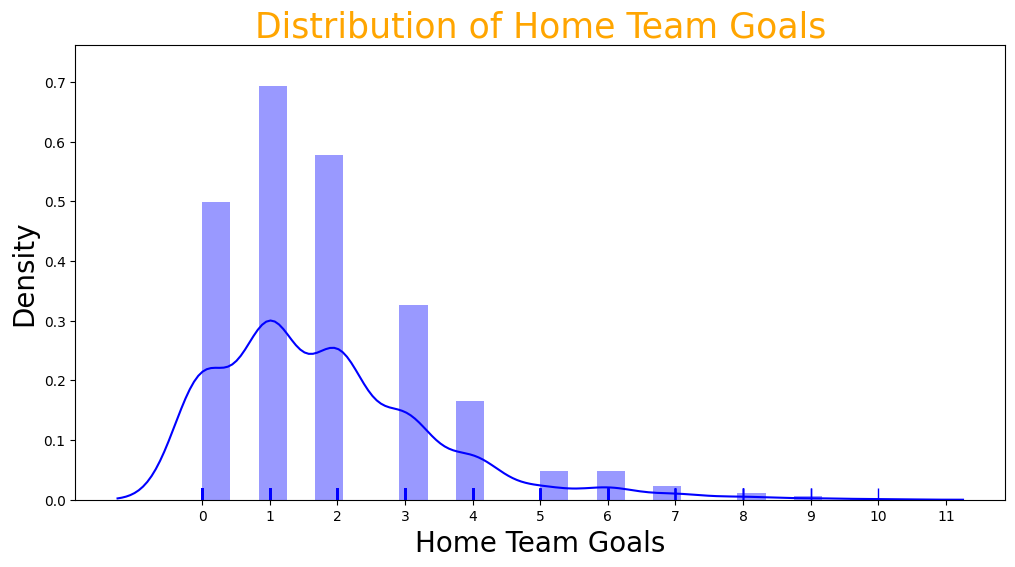

In [34]:
plt.figure(figsize=(12,13))
plt.subplot(211)
sns.distplot(df_Matches["Home Team Goals"],color="b",rug=True)
plt.xticks(np.arange(0,12,1))
plt.xlabel("Home Team Goals", fontsize=20)
plt.ylabel("Density", fontsize=20)    
plt.title("Distribution of Home Team Goals" , fontsize = 25 , color = "orange")
plt.show()

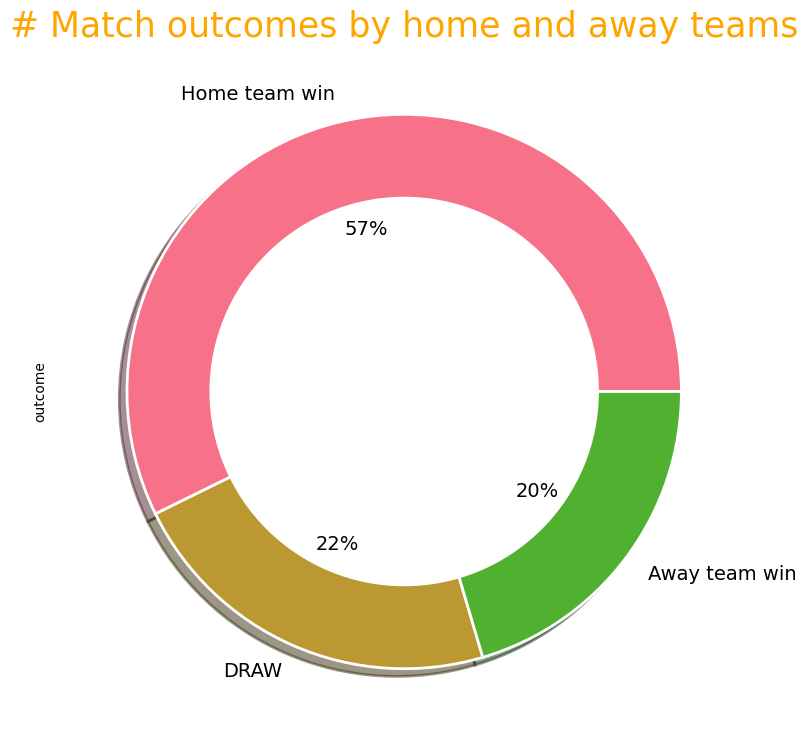

In [35]:
def label(df_Matches):
    if df_Matches["Home Team Goals"] > df_Matches["Away Team Goals"]:
        return "Home team win"
    if df_Matches["Away Team Goals"] > df_Matches["Home Team Goals"]:
        return "Away team win"
    if df_Matches["Home Team Goals"] == df_Matches["Away Team Goals"]:
        return "DRAW"

df_Matches["outcome"] = df_Matches.apply(lambda df_Matches:label(df_Matches),axis=1)
plt.figure(figsize=(9,9))
df_Matches["outcome"].value_counts().plot.pie(autopct="%1.0f%%",fontsize =14,
                                           colors = sns.color_palette("husl"),
                                           wedgeprops={"linewidth":2,"edgecolor":"white"},
                                           shadow=True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("# Match outcomes by home and away teams" , fontsize = 25 , color = "orange")
plt.show()

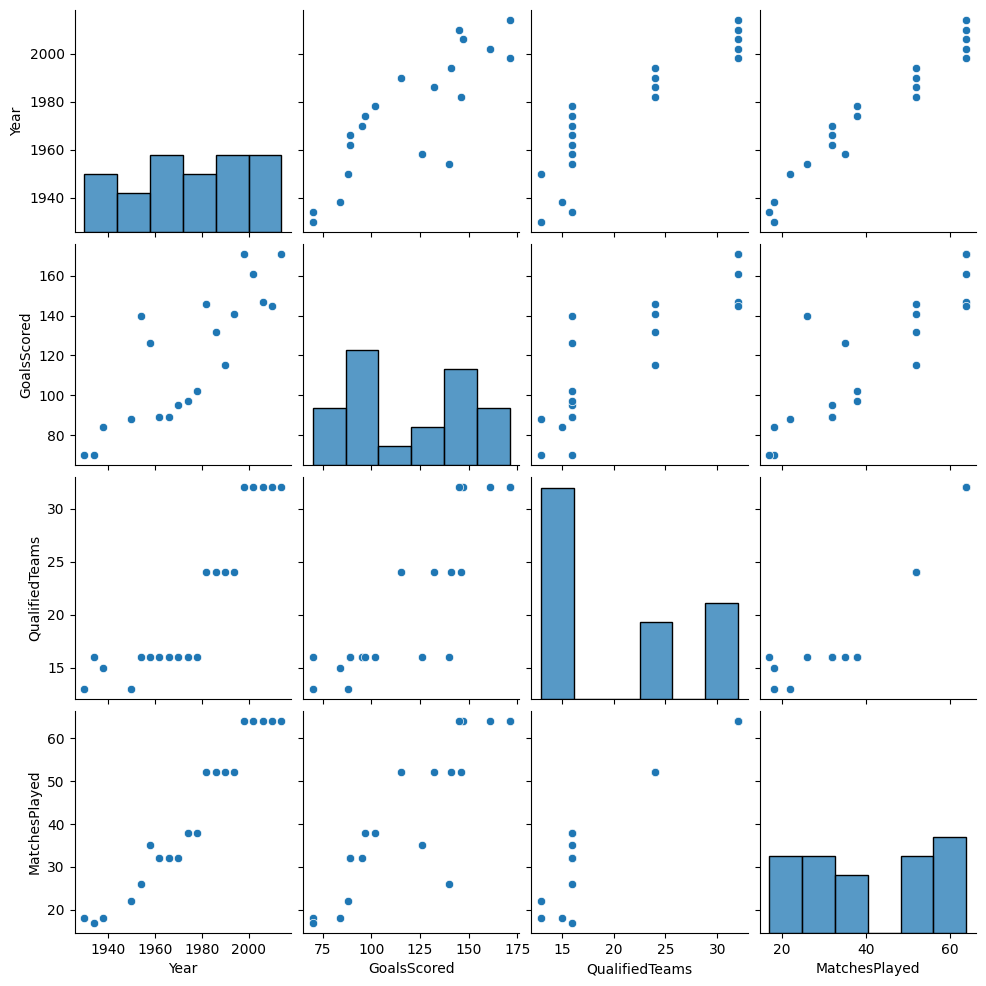

In [36]:
import seaborn as sns
sns.pairplot(df_Cups)

<AxesSubplot: >

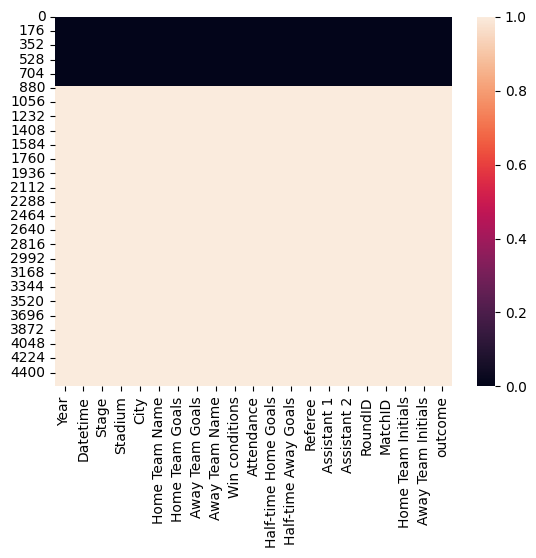

In [37]:
# Visualization of null values

sns.heatmap(df_Matches.isnull(), cbar= True)

<AxesSubplot: >

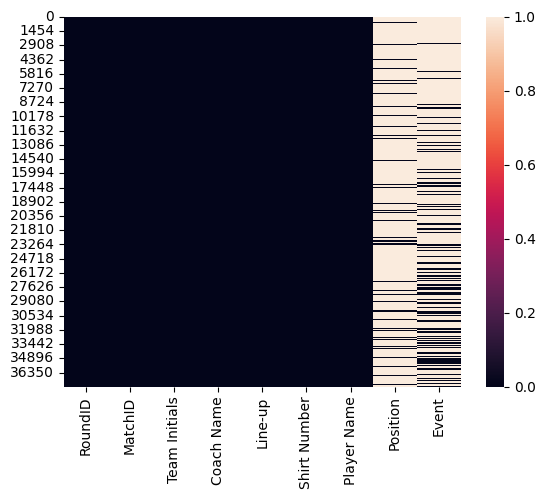

In [38]:
# Visualization of null values
sns.heatmap(df_Players.isnull(), cbar= True)

In [ ]:
#####  Observations/summary  ########


Findings and comments to RQ1: According to barchart following national teams are considered to be favorites of World Cup: Brazil,Argentina,Germany,Italy, France,Spain,Netherlands,Hungary and Uruguay. Brazil have won World Cup 5 times and footbal appeared in this country, that is why Brazil on the first place.Also, we can see big fluctuation after Brazil and gradualy decreases from Argentina to Uruguay.Next interesting thing that I found that only South American and European countries are considered to be favorites.

I have found one thing to consider from this barchart. On the the table goals scored by Germany national team and Germany FR are given sepately. I thought it is because of some historical changes of Germany. So, It will be better to sum data of Germany FR and Germany.

Research question 3 How does the attendance of people has changed by development of World Cup? So, this question is about number of fans who attend the matches. Firstly, I had to find average number of fans who attended the matches by the year. So, on my dataset it shows number of attended fans of every football match by the year. That is why I found mean attendance and marked it on "Y" axis and respectively year on "X" axis. I already did data preparation part for this question by dropping NaN values from table. I need only two columns from the table, there are "Year" and "Attendance" columns.
